In [170]:
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
from xml.dom.minidom import parse
from nltk.tokenize import word_tokenize

In [146]:
DATA_PATH = '../../data/Train/DrugBank'

In [147]:
def parse_drugs_from_file(file_path):
    tree = parse(file_path)
    sentences = tree.getElementsByTagName("sentence")
    parsed_drugs = []
    for s in sentences:
        entities = s.getElementsByTagName('entity')
        for entity in entities: 
            drug = entity.attributes['text'].value
            drug_type =  entity.attributes['type'].value
            parsed_drugs.append((drug,drug_type))
    parsed_drugs = np.array(parsed_drugs)
    return parsed_drugs
broken_files = 0
drugs =  np.empty((0,2), int)
for f in os.listdir(DATA_PATH):
    parsed_drugs = parse_drugs_from_file(os.path.join(DATA_PATH,f))
    try: 
        drugs = np.append(drugs,parsed_drugs, axis=0)
    except: 
        broken_files+=1
#         print('No drugs in file {}'.format(f))

print('Drug shape: {}\nBroken files: {}'.format(drugs.shape,broken_files))

Drug shape: (12929, 2)
Broken files: 28


In [148]:
drugs_df = pd.DataFrame(drugs,columns=['drug','type'])
drugs_df.head()

,drug,type
0,anticoagulants,group
1,blood thinner,group
2,carbamazepine,drug
3,corticotropin,drug
4,barbiturates,group


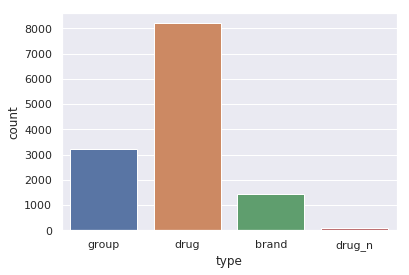

In [149]:
sns.countplot(drugs_df.type)

In [150]:
def extract_features(drugs_df):
    drugs_df['prefix'] = drugs_df['drug'].str[:4]
    drugs_df['sufix'] = drugs_df['drug'].str[-5:]
    drugs_df['n_words'] = drugs_df['drug'].str.split(' ').apply(len)
    drugs_df['capitals'] = drugs_df['drug'].str.isupper()
    return drugs_df

drugs_df = extract_features(drugs_df)

In [151]:
drugs_df.head()

,drug,type,prefix,sufix,n_words,capitals
0,anticoagulants,group,anti,lants,1,False
1,blood thinner,group,bloo,inner,2,False
2,carbamazepine,drug,carb,epine,1,False
3,corticotropin,drug,cort,ropin,1,False
4,barbiturates,group,barb,rates,1,False


## Only drugs

In [187]:
only_drugs = drugs_df.loc[drugs_df['type'] == 'drug']
only_drugs.head()

,drug,type,prefix,sufix,n_words,capitals
2,carbamazepine,drug,carb,epine,1,False
3,corticotropin,drug,cort,ropin,1,False
7,divalproex sodium,drug,diva,odium,2,False
8,valproic acid,drug,valp,acid,2,False
14,escitalopram,drug,esci,opram,1,False


In [177]:
def restricted_countplot(df,n):
    plt.figure(figsize=(10,6))
    names = list(df.value_counts()[:n].index)
    values = df.value_counts()[:n].values
    sns.barplot(names,values)

Text(0.5, 1.0, 'Suffixes')

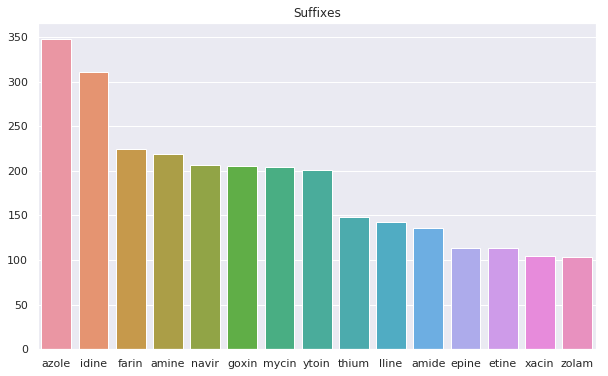

In [181]:
restricted_countplot(only_drugs['sufix'],15)
plt.title('Suffixes')

Text(0.5, 1.0, 'Prexixes')

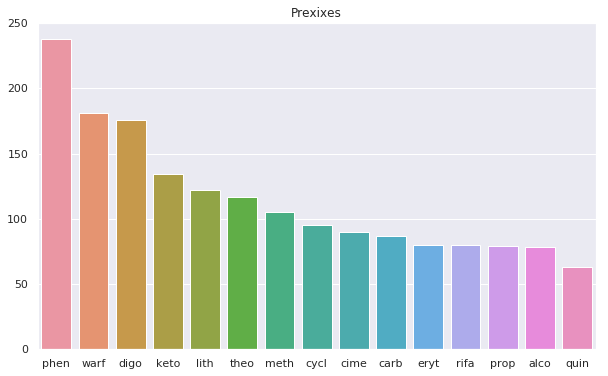

In [182]:
restricted_countplot(only_drugs['prefix'],15)
plt.title('Prexixes')

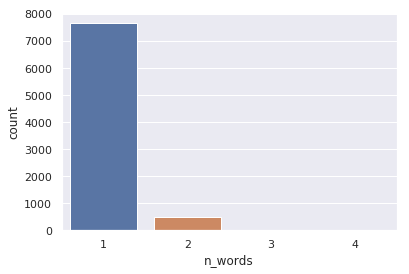

In [183]:
sns.countplot(only_drugs['n_words'])

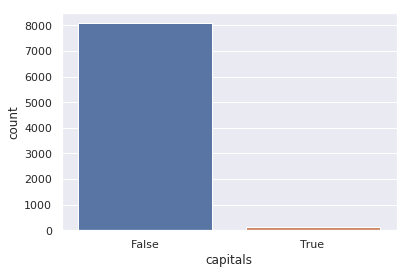

In [184]:
sns.countplot(only_drugs['capitals'])

## Brands

In [160]:
only_brands = drugs_df.loc[drugs_df['type'] == 'brand']
only_brands.head()

,drug,type,prefix,sufix,n_words,capitals
16,LEXAPRO,brand,LEXA,XAPRO,1,True
20,LEXAPRO,brand,LEXA,XAPRO,1,True
24,Aspirin,brand,Aspi,pirin,1,False
28,aspirin,brand,aspi,pirin,1,False
29,LEXAPRO,brand,LEXA,XAPRO,1,True


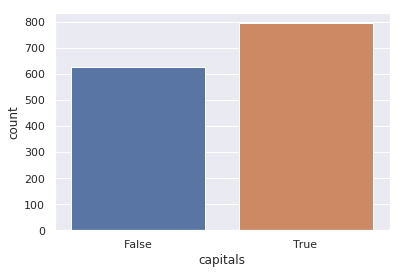

In [185]:
sns.countplot(only_brands['capitals'])